# TEXT ANALYTICS GROUP ASSIGNMENT #2

#### Group Members: Brooks Beckelman, Zack Bilderback, Dallas Griffin, Estevan Gonzalez, Sean Kessel, Davis Townsend

In [114]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

import seaborn

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
yelp = pd.read_csv('YelpData.csv')

In [3]:
# Convert rating to high (4,5) or low (1,2,3)
yelp['rating'] = np.where(yelp['stars'] >= 4, 'high','low')
yelp.head(3)

,stars,votes_cool,votes_funny,votes_useful,Cheap,Moderate,Expensive,VeryExpensive,American,Chinese,...,Indian,Italian,Greek,Mediterranean,Mexican,Thai,Vietnamese,Others,Review,rating
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,This location is out of business. I drove by i...,low
1,2,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,= = = = = = CLOSED = = = = = =This JB s locati...,low
2,4,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,This is just a basic (albeit mini) chain greas...,high


## Task A

In [4]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(yelp, test_size=0.25, random_state=123)

In [15]:
x_train = train.drop(['stars', 'Review', 'rating'], axis=1)
y_train = train['rating']

x_test = test.drop(['stars', 'Review', 'rating'], axis=1)
y_test = test['rating']

### Logistic Regression

In [95]:
import sklearn
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg_classifier = logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_testAccuracy = logreg.score(x_test, y_test)

print 'Logistic Regression Accuracy:', logreg_testAccuracy

Logistic Regression Accuracy: 0.6844


### KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,101)
accuracies = []
for k in k_range:
    if k % 10 == 0:
        print 'Performing classifier', k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_classifier = knn.fit(x_train, y_train)
    knn_accuracy = knn.score(x_test, y_test)
    accuracies.append(knn_accuracy)


Performing classifier 10
Performing classifier 20
Performing classifier 30
Performing classifier 40
Performing classifier 50
Performing classifier 60
Performing classifier 70
Performing classifier 80
Performing classifier 90
Performing classifier 100


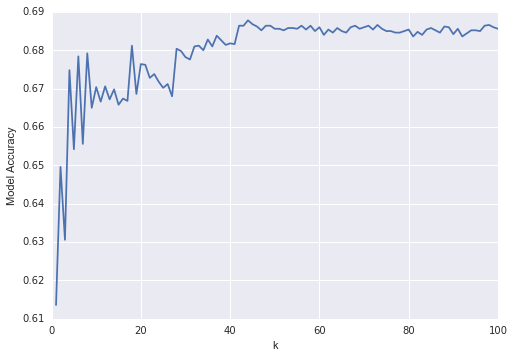

In [116]:
plot(k_range, accuracies)
xlabel('k')
ylabel('Model Accuracy')

In [133]:
s_accuracies = Series(accuracies)

k = s_accuracies.idxmax() + 1
knn = KNeighborsClassifier(n_neighbors=k)
knn_classifier = knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
knn_accuracy = knn.score(x_test, y_test)

print 'KNN (k = %i) Accuracy: %.4f' % (k, knn_accuracy)

KNN (k = 44) Accuracy: 0.6878


## Naive Bayes

In [100]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb_classifier = bnb.fit(x_train, y_train)
bnb_predict = bnb.predict(x_test)
bnb_accuracy = bnb.score(x_test, y_test)

print 'Bernoulli Naive Bays Accuracy:', bnb_accuracy

Bernoulli Naive Bays Accuracy: 0.6816


In [102]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb_classifier = mnb.fit(x_train, y_train)
mnb_predict = mnb.predict(x_test)
mnb_accuracy = mnb.score(x_test, y_test)

print 'Multinomial Naive Bayes Accuracy:', mnb_accuracy

Multinomial Naive Bayes Accuracy: 0.6812
